## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
print('Train column:', df_train.columns)
print('Test column:', df_test.columns)

Train column: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test column: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [5]:
#可以嘗試用範例的程式
print(df_test.info(), '\n')
print(df_test.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None 

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [6]:
#合併資料
df = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
# 以 XXX 為例，先看 Cabin  出現值的特性
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df['Cabin_new'] = df['Cabin'].apply(lambda x: 'nan' if pd.isnull(x) else x[0])
for i in df['Cabin_new'].unique():
    print(i, len(df[df['Cabin_new'] == i]))

nan 1014
C 94
E 41
G 5
D 46
A 22
B 65
F 21
T 1


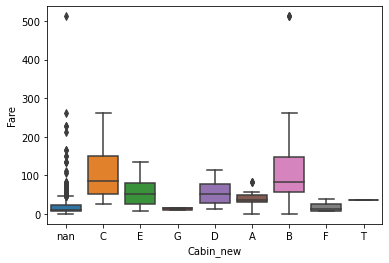

In [9]:
sns.boxplot(data=df, x='Cabin_new', y='Fare')

In [10]:
df.groupby('Cabin_new')['Fare'].median()

Cabin_new
A      35.0771
B      82.2667
C      86.2896
D      52.5542
E      53.1000
F      13.0000
G      16.7000
T      35.5000
nan    10.5000
Name: Fare, dtype: float64

In [11]:
df['Cabin_new'] = df['Cabin_new'].str.replace('B', 'bc')
df['Cabin_new'] = df['Cabin_new'].str.replace('C', 'bc')
df['Cabin_new'] = df['Cabin_new'].str.replace('D', 'de')
df['Cabin_new'] = df['Cabin_new'].str.replace('E', 'de')
df['Cabin_new'] = df['Cabin_new'].str.replace('A', 'at')
df['Cabin_new'] = df['Cabin_new'].str.replace('T', 'at')
df['Cabin_new'] = df['Cabin_new'].str.replace('F', 'fg')
df['Cabin_new'] = df['Cabin_new'].str.replace('G', 'fg')

df['Cabin_new'].unique()

array(['nan', 'bc', 'de', 'fg', 'at'], dtype=object)

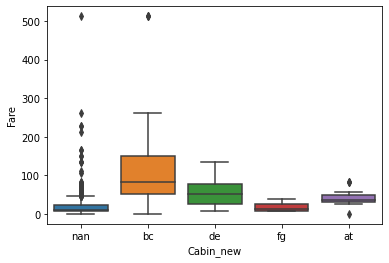

In [12]:
sns.boxplot(data=df, x='Cabin_new', y='Fare')

In [13]:
print(df.groupby('Cabin_new')['Fare'].median())
print(df.groupby('Cabin_new')['Fare'].mean())

Cabin_new
at     35.5000
bc     83.4750
de     52.5542
fg     13.0000
nan    10.5000
Name: Fare, dtype: float64
Cabin_new
at      40.994561
bc     113.836480
de      53.741237
fg      17.334296
nan     19.132707
Name: Fare, dtype: float64


In [14]:
cabin = pd.cut(df[df['Cabin_new'] == 'nan']['Fare'], bins=[0, 35, 53, 83, np.inf], labels=['fg', 'at', 'de', 'bc'])

fg 931
bc 173
de 129
at 62
nan 0

 Cabin_new
at    39.6875
bc    90.0000
de    59.4000
fg     9.5875
Name: Fare, dtype: float64

 Cabin_new
at     41.845500
bc    120.197497
de     58.092667
fg     13.606815
Name: Fare, dtype: float64


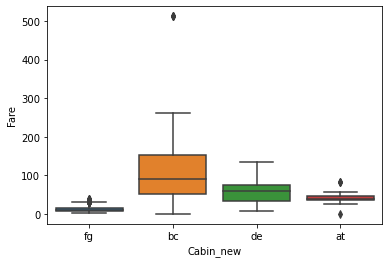

In [15]:
for i in np.arange(0,1309):
    if df.iloc[i, 12] == 'nan':
        df.iloc[i, 12] = cabin[i]
        
for i in df['Cabin_new'].unique():
    print(i, len(df[df['Cabin_new'] == i]))
    
sns.boxplot(data=df, x='Cabin_new', y='Fare')
print('\n', df.groupby('Cabin_new')['Fare'].median())
print('\n', df.groupby('Cabin_new')['Fare'].mean())